In [203]:
# from google.colab import drive
# drive.mount('/content/drive')

In [204]:
%cd /content/drive/MyDrive/ML\ csv
%ls

/content/drive/MyDrive/ML csv
 beagle-hound-dog.png                                house-prices-advanced-regression-techniques/
 Book1.xlsx                                          housing.csv
 book-composition-with-open-book_23-2147690555.png   laptop_price.csv
 cancer_data.csv                                     NumbersCSV/
 candy-data.csv                                      petrol_consumption.csv
'Copy of dog.png'                                    prices.csv
 customer_behavior_analytcis.csv                     stack-overflow-developer-survey-2022/
 customer_segments_all_methods.csv                   test.csv
 data.csv                                            test.gdoc
 ds_salaries.csv                                     xyz.csv


In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score


In [257]:
data = pd.read_csv('customer_behavior_analytcis.csv')
data

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [258]:
def dataset_summary(df):
    summary = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Missing Values': df.isnull().sum(),
        'Unique Values': df.nunique(),
        'Sample Values': [df[col].dropna().unique()[:5] for col in df.columns]
    })
    return summary

dataset_summary(data)


,Column,Data Type,Non-Null Count,Missing Values,Unique Values,Sample Values
total_purchases,total_purchases,float64,979,20,32,"[7.0, 22.0, 2.0, 25.0, 12.0]"
avg_cart_value,avg_cart_value,float64,979,20,943,"[129.34, 24.18, 32.18, 26.85, 125.45]"
total_time_spent,total_time_spent,float64,999,0,953,"[52.17, 9.19, 90.69, 11.22, 34.19]"
product_click,product_click,float64,979,20,64,"[18.0, 15.0, 50.0, 16.0, 30.0]"
discount_counts,discount_counts,float64,999,0,21,"[0.0, 7.0, 2.0, 10.0, 3.0]"
customer_id,customer_id,object,999,0,999,"[CM00000, CM00001, CM00002, CM00003, CM00004]"


In [259]:
data.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


# 1. DataPreprocesseing


In [209]:
unique_customer_ids = data['customer_id'].unique()
num_unique_customers = len(unique_customer_ids)
print(f"\nNumber of Unique Customers: {num_unique_customers}") # all customer has uniiique ID


Number of Unique Customers: 999


In [210]:
df_notPP = data

In [211]:
rows_with_nan = df_notPP[df_notPP.isnull().any(axis=1)]
print(rows_with_nan.shape)
rows_with_nan

(20, 6)


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
97,NaN,NaN,117.04,NaN,0.0,CM00097
139,NaN,NaN,33.76,NaN,3.0,CM00139
212,NaN,NaN,42.70,NaN,0.0,CM00212
253,NaN,NaN,21.28,NaN,12.0,CM00253
294,NaN,NaN,47.80,NaN,2.0,CM00294
310,NaN,NaN,82.11,NaN,0.0,CM00310
317,NaN,NaN,55.19,NaN,0.0,CM00317
353,NaN,NaN,45.26,NaN,1.0,CM00353
409,NaN,NaN,22.95,NaN,10.0,CM00409
425,NaN,NaN,28.41,NaN,7.0,CM00425


In [212]:
df_notPP = df_notPP.dropna()

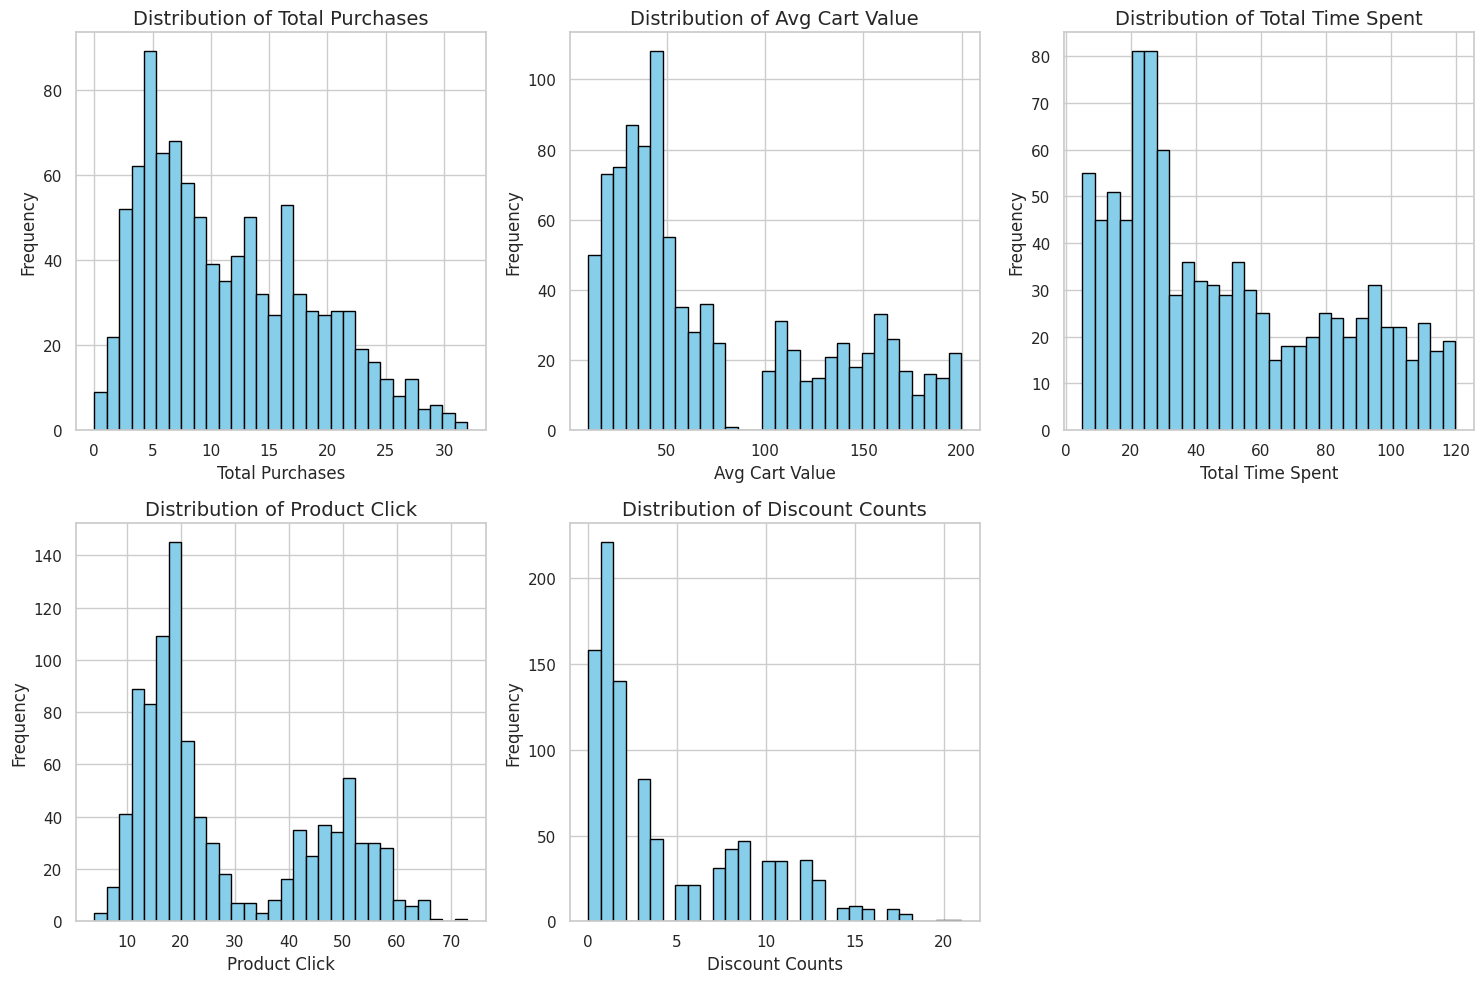

In [255]:
import matplotlib.pyplot as plt

# List of features to iterate through
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

# Create a subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for histograms
axes = axes.flatten()  # Flatten the 2D axes array into 1D

# Iterate over the features and plot histograms
for i, feature in enumerate(features):
    axes[i].hist(df_notPP[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {feature.replace('_', ' ').title()}", fontsize=14)
    axes[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove the empty subplot (last one) and adjust layout
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


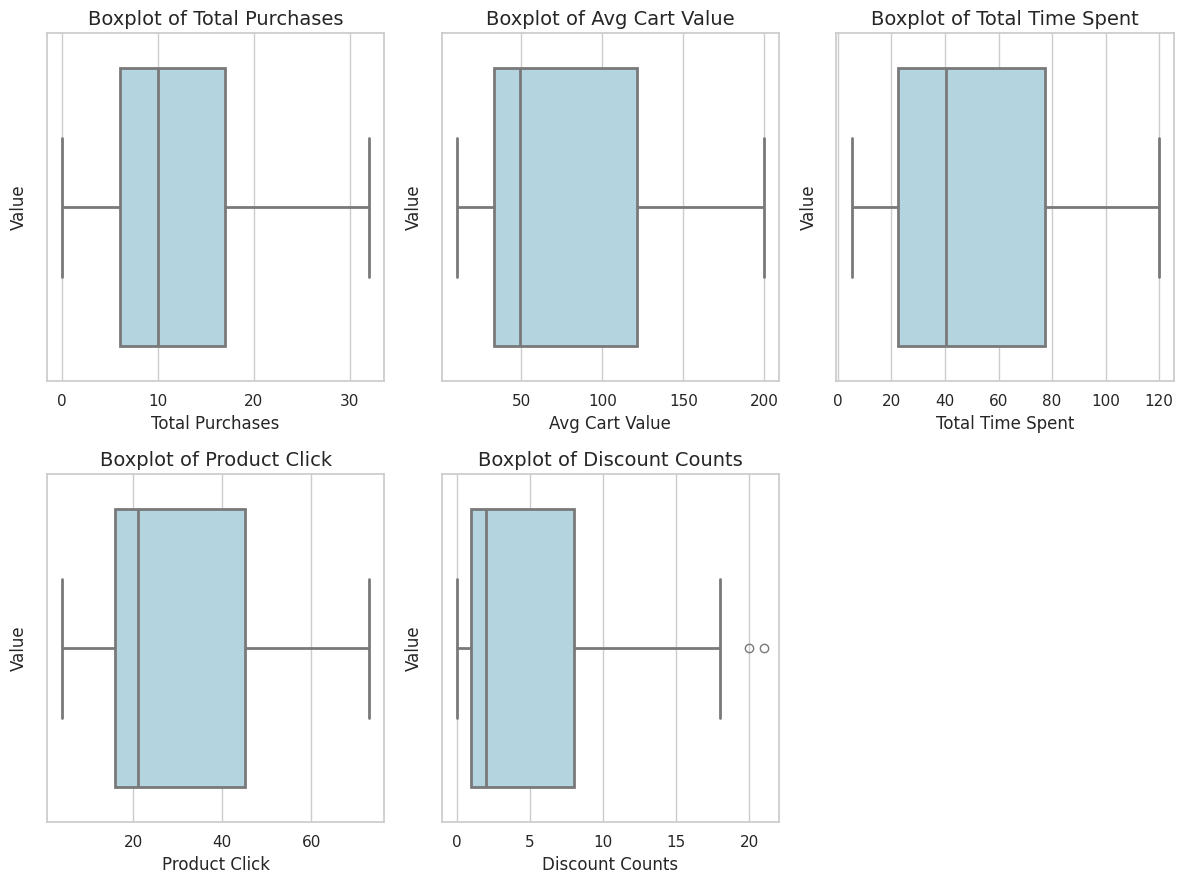

In [252]:

features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 9))

# Loop over the features to generate the boxplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Create 2x3 grid of plots
    sns.boxplot(x=df_notPP[feature], color='lightblue', fliersize=6, linewidth=2)
    plt.title(f"Boxplot of {feature.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Value", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [213]:
from sklearn.ensemble import IsolationForest

np.random.seed(42)

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05)  # Assuming 5% outliers\
x = pd.DataFrame()
x['Outlier'] = iso_forest.fit_predict(df_notPP.drop(columns=["customer_id"]))

# The 'Outlier' column will contain -1 for outliers and 1 for normal points
outliers = x[x['Outlier'] == -1]

# Display the outliers
print(outliers.shape)
# Ensure the indices align
x = x.set_index(df_notPP.index)

print(df_notPP.shape)

# Remove the rows where Outlier is -1 (i.e., outliers)
df = df_notPP[~x['Outlier'].isin([-1])]

# Display the cleaned DataFrame
print(df.shape)


(49, 1)
(979, 6)
(930, 6)


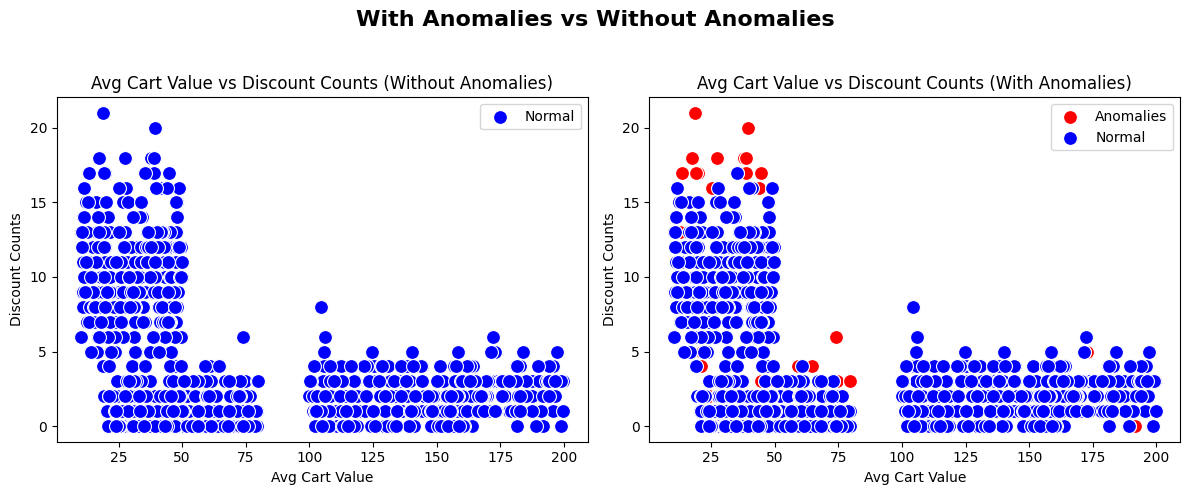

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature pair

# x_feature, y_feature = 'total_purchases', 'avg_cart_value'
# x_feature, y_feature = 'total_purchases', 'discount_counts'
# x_feature, y_feature = 'total_time_spent', 'product_click'
x_feature, y_feature = 'avg_cart_value', 'discount_counts'
# x_feature, y_feature = 'product_click', 'discount_counts'

import matplotlib.pyplot as plt
import seaborn as sns

# Identify anomalies (points in df but not in df_notPP)
anomalies = df.loc[~df.isin(df_notPP).all(axis=1), [x_feature, y_feature]]

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
fig.suptitle("With Anomalies vs Without Anomalies", fontsize=16, fontweight='bold')  # Main title

# Scatterplot for df_notPP (Without Anomalies) -> Only normal points (Blue)
sns.scatterplot(ax=axes[0], x=df_notPP[x_feature], y=df_notPP[y_feature], color='blue', s=100, label="Normal")
axes[0].set_xlabel(x_feature.replace('_', ' ').title())
axes[0].set_ylabel(y_feature.replace('_', ' ').title())
axes[0].set_title(f"{x_feature.replace('_', ' ').title()} vs {y_feature.replace('_', ' ').title()} (Without Anomalies)")
axes[0].legend()

# Scatterplot for df (With Anomalies) -> Normal points (Blue) + Anomalies (Red)
sns.scatterplot(ax=axes[1], x=df_notPP[x_feature], y=df_notPP[y_feature], color='red', s=100, label="Anomalies")  # Normal points (Blue)
sns.scatterplot(ax=axes[1], x=anomalies[x_feature], y=anomalies[y_feature], color='blue', s=100, label="Normal")  # Anomalies (Red)
axes[1].set_xlabel(x_feature.replace('_', ' ').title())
axes[1].set_ylabel(y_feature.replace('_', ' ').title())
axes[1].set_title(f"{x_feature.replace('_', ' ').title()} vs {y_feature.replace('_', ' ').title()} (With Anomalies)")
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


In [215]:
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [216]:
rows_without_nan = pd.DataFrame(df['customer_id'])
df = df.drop(columns=['customer_id'])
rows_without_nan

,customer_id
0,CM00000
1,CM00001
2,CM00002
3,CM00003
4,CM00004
...,...
994,CM00994
995,CM00995
996,CM00996
997,CM00997


# 1. Exploratory Data Analysis (EDA)

In [243]:
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

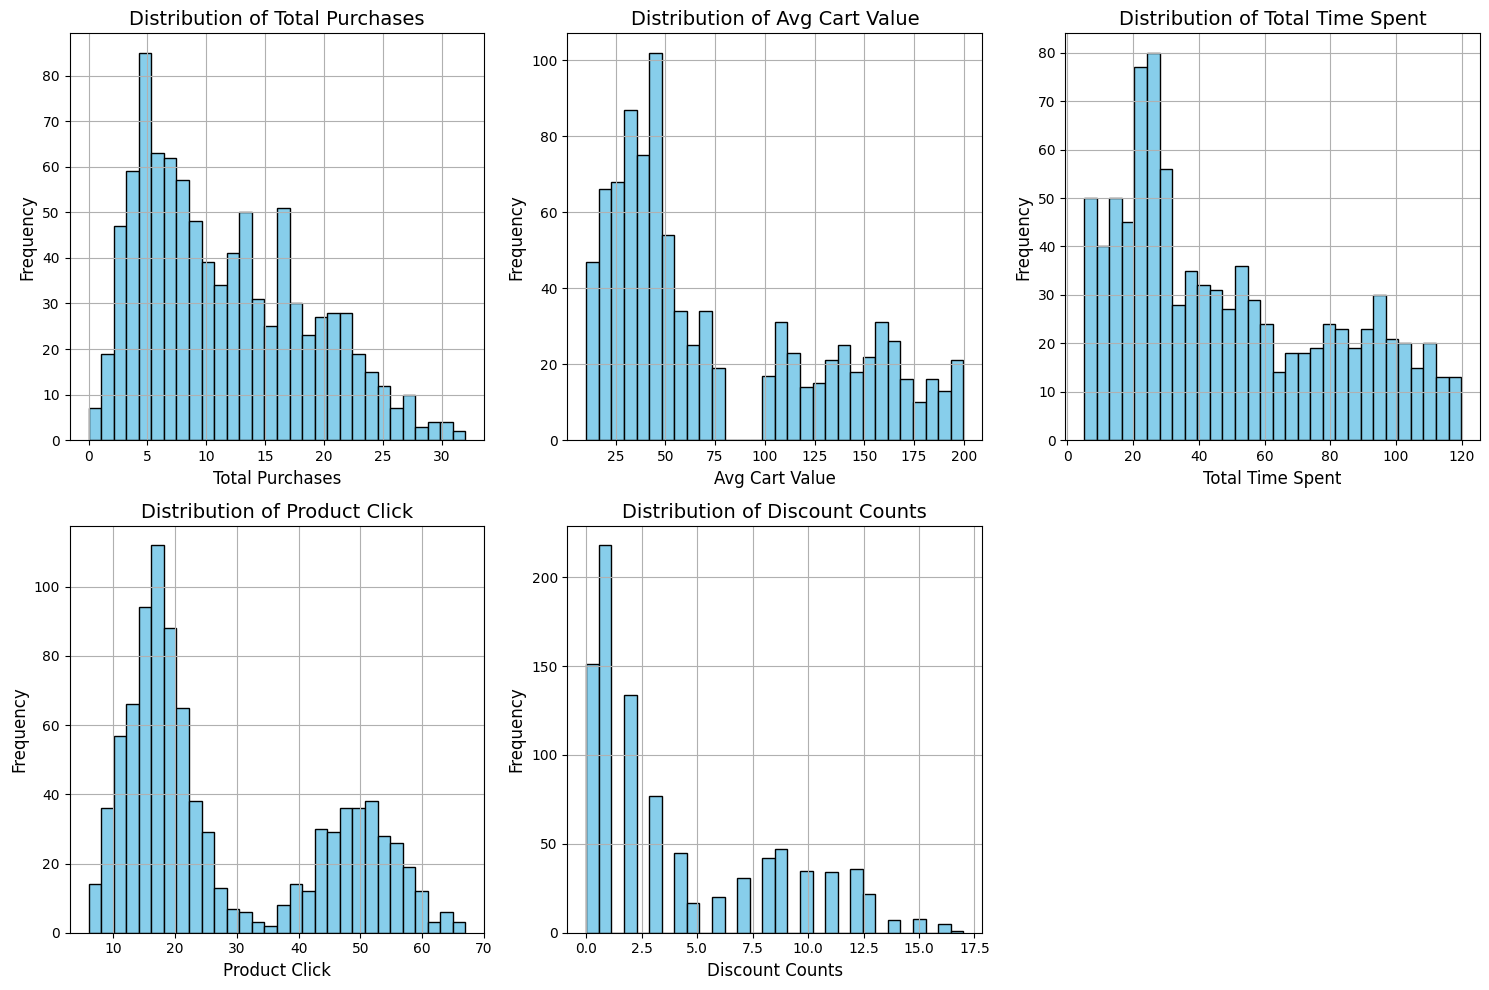

In [248]:
import matplotlib.pyplot as plt

# List of features to iterate through
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

# Create a subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for histograms
axes = axes.flatten()  # Flatten the 2D axes array into 1D

# Iterate over the features and plot histograms
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {feature.replace('_', ' ').title()}", fontsize=14)
    axes[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove the empty subplot (last one) and adjust layout
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


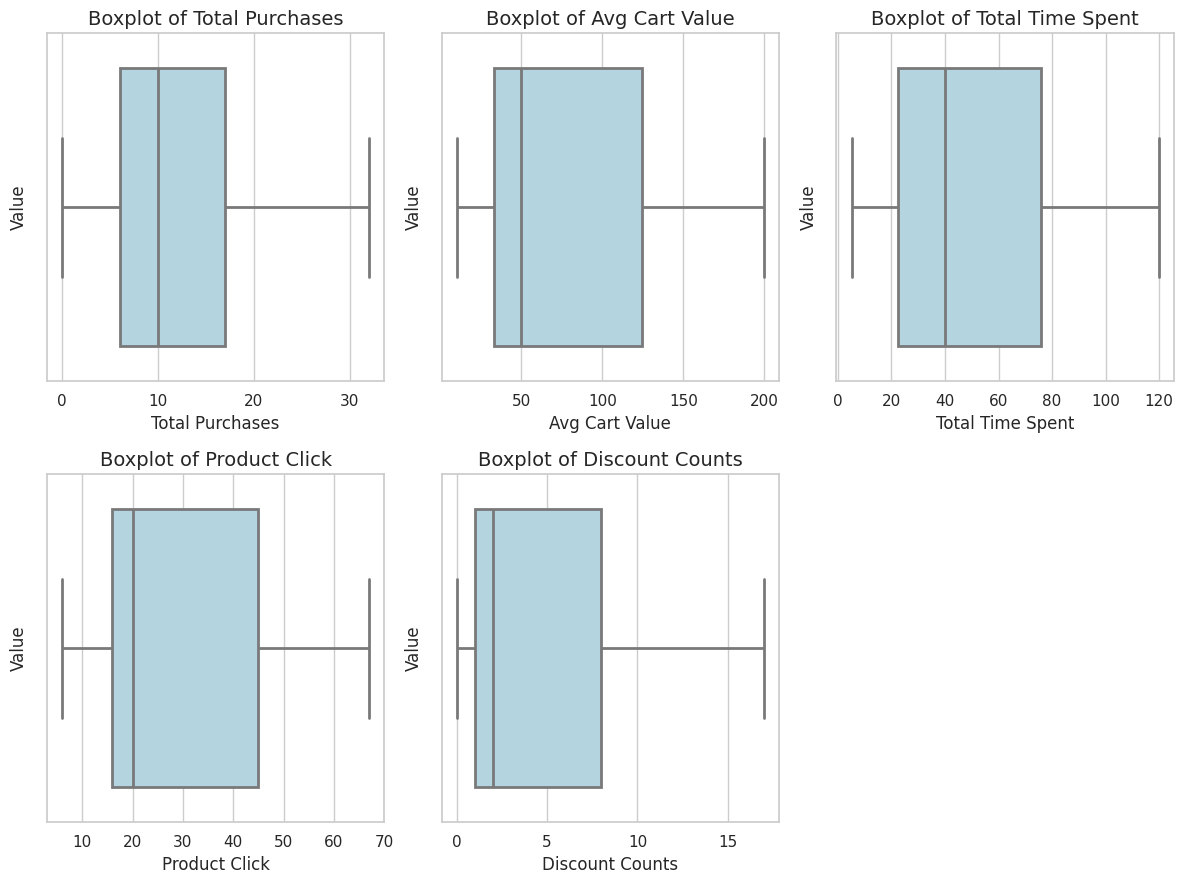

In [254]:

features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 9))

# Loop over the features to generate the boxplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Create 2x3 grid of plots
    sns.boxplot(x=df[feature], color='lightblue', fliersize=6, linewidth=2)
    plt.title(f"Boxplot of {feature.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Value", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


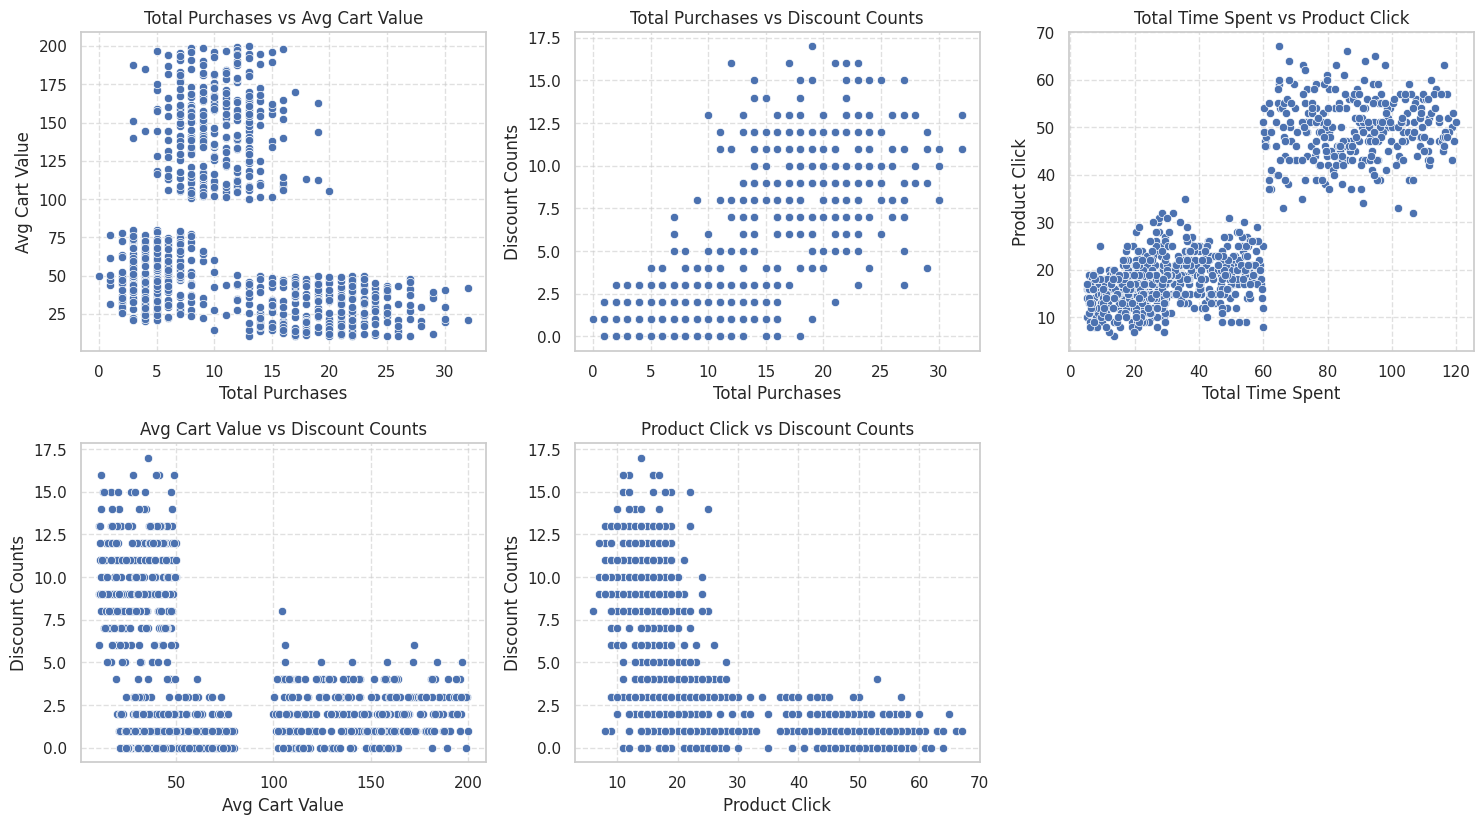

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Define feature pairs to plot
feature_pairs = [
    ('total_purchases', 'avg_cart_value'),
    ('total_purchases', 'discount_counts'),
    ('total_time_spent', 'product_click'),
    ('avg_cart_value', 'discount_counts'),
    ('product_click', 'discount_counts')
]

# Create a figure with a 3x3 grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily index subplots

# Loop through feature pairs and plot them in the grid
for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[idx]

    sns.scatterplot(
        x=df[x_feature], y=df[y_feature], linewidth=0.5, ax=ax
    )

    ax.set_title(f"{x_feature.replace('_', ' ').title()} vs {y_feature.replace('_', ' ').title()}")
    ax.set_xlabel(x_feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel(y_feature.replace('_', ' ').title(), fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.6)

# Hide any unused subplots
for idx in range(len(feature_pairs), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [278]:
print(corr_matrix)

                  total_purchases  avg_cart_value  total_time_spent  \
total_purchases          1.000000       -0.252168         -0.756364   
avg_cart_value          -0.252168        1.000000         -0.062865   
total_time_spent        -0.756364       -0.062865          1.000000   
product_click           -0.711576       -0.220775          0.867221   
discount_counts          0.771386       -0.445106         -0.676255   

                  product_click  discount_counts  
total_purchases       -0.711576         0.771386  
avg_cart_value        -0.220775        -0.445106  
total_time_spent       0.867221        -0.676255  
product_click          1.000000        -0.597590  
discount_counts       -0.597590         1.000000  


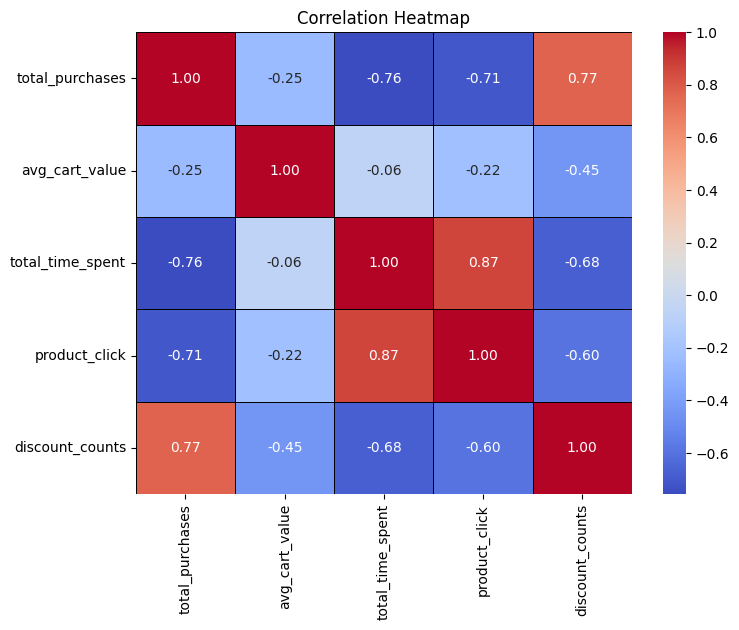

In [218]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

plt.title("Correlation Heatmap")
plt.show()

In [219]:
temp_df = df

In [220]:
df = temp_df


# 2. Feature Engineering & Preprocessing

In [221]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.66184272,  0.96045788,  0.1063378 , -0.62136055, -0.9711206 ],
       [ 1.51209323, -0.94416942, -1.23542317, -0.80891826,  0.67737877],
       [-1.38648804, -0.79927575,  1.30886531,  1.37925505, -0.50012078],
       ...,
       [ 0.93237698, -1.02838886, -0.62416957, -0.62136055,  0.91287869],
       [-1.09662992, -0.85741433,  0.73382489,  1.81688971, -0.26462087],
       [ 2.52659668, -0.6705015 , -1.21044856, -0.74639902,  1.61937842]])

# 3. Model Selection and Evaluation

In [222]:
# Variables to store metrics
inertia = []  # Only for K-Means
silhouette_scores = {"KMeans": [], "GMM": [], "Agglomerative": []}
davies_bouldin_scores = {"KMeans": [], "GMM": [], "Agglomerative": []}

k_values = range(2, 10)

## KMean


In [223]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    inertia.append(kmeans.inertia_)  # Only for K-Means
    silhouette_scores["KMeans"].append(silhouette_score(df_scaled, kmeans_labels))
    davies_bouldin_scores["KMeans"].append(davies_bouldin_score(df_scaled, kmeans_labels))
    print(f"KMeans - k={k} , inertia={kmeans.inertia_}, Silhouette: {silhouette_scores['KMeans'][-1]:.3f}, DB Index: {davies_bouldin_scores['KMeans'][-1]:.3f}")

KMeans - k=2 , inertia=2225.903881106292, Silhouette: 0.500, DB Index: 0.774
KMeans - k=3 , inertia=736.6952992120924, Silhouette: 0.632, DB Index: 0.542
KMeans - k=4 , inertia=650.4334335848729, Silhouette: 0.507, DB Index: 1.006
KMeans - k=5 , inertia=588.926166947791, Silhouette: 0.371, DB Index: 1.358
KMeans - k=6 , inertia=531.4425321788332, Silhouette: 0.373, DB Index: 1.219
KMeans - k=7 , inertia=475.85418310831375, Silhouette: 0.247, DB Index: 1.390
KMeans - k=8 , inertia=449.3536422324353, Silhouette: 0.236, DB Index: 1.388
KMeans - k=9 , inertia=424.8827233724599, Silhouette: 0.231, DB Index: 1.362


## Gaussian Mixture Model (GMM)


In [224]:
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(df_scaled)

    silhouette_scores["GMM"].append(silhouette_score(df_scaled, gmm_labels))
    davies_bouldin_scores["GMM"].append(davies_bouldin_score(df_scaled, gmm_labels))
    print(f"GMM - k={k} - Silhouette: {silhouette_scores['GMM'][-1]:.3f}, DB Index: {davies_bouldin_scores['GMM'][-1]:.3f}")

GMM - k=2 - Silhouette: 0.493, DB Index: 0.753
GMM - k=3 - Silhouette: 0.632, DB Index: 0.542
GMM - k=4 - Silhouette: 0.496, DB Index: 1.086
GMM - k=5 - Silhouette: 0.353, DB Index: 1.443
GMM - k=6 - Silhouette: 0.302, DB Index: 2.179
GMM - k=7 - Silhouette: 0.175, DB Index: 2.230
GMM - k=8 - Silhouette: 0.150, DB Index: 2.357
GMM - k=9 - Silhouette: 0.203, DB Index: 1.656


## Agglomerative Clustering

In [225]:
for k in k_values:
    agglom = AgglomerativeClustering(n_clusters=k)
    agglom_labels = agglom.fit_predict(df_scaled)

    silhouette_scores["Agglomerative"].append(silhouette_score(df_scaled, agglom_labels))
    davies_bouldin_scores["Agglomerative"].append(davies_bouldin_score(df_scaled, agglom_labels))
    print(f"Agglomerative - k={k} - Silhouette: {silhouette_scores['Agglomerative'][-1]:.3f}, DB Index: {davies_bouldin_scores['Agglomerative'][-1]:.3f}")

Agglomerative - k=2 - Silhouette: 0.501, DB Index: 0.768
Agglomerative - k=3 - Silhouette: 0.632, DB Index: 0.542
Agglomerative - k=4 - Silhouette: 0.500, DB Index: 1.046
Agglomerative - k=5 - Silhouette: 0.352, DB Index: 1.464
Agglomerative - k=6 - Silhouette: 0.340, DB Index: 1.352
Agglomerative - k=7 - Silhouette: 0.195, DB Index: 1.574
Agglomerative - k=8 - Silhouette: 0.195, DB Index: 1.537
Agglomerative - k=9 - Silhouette: 0.187, DB Index: 1.527


## Let's compare each of the above evaluation parameters across different clustering models.

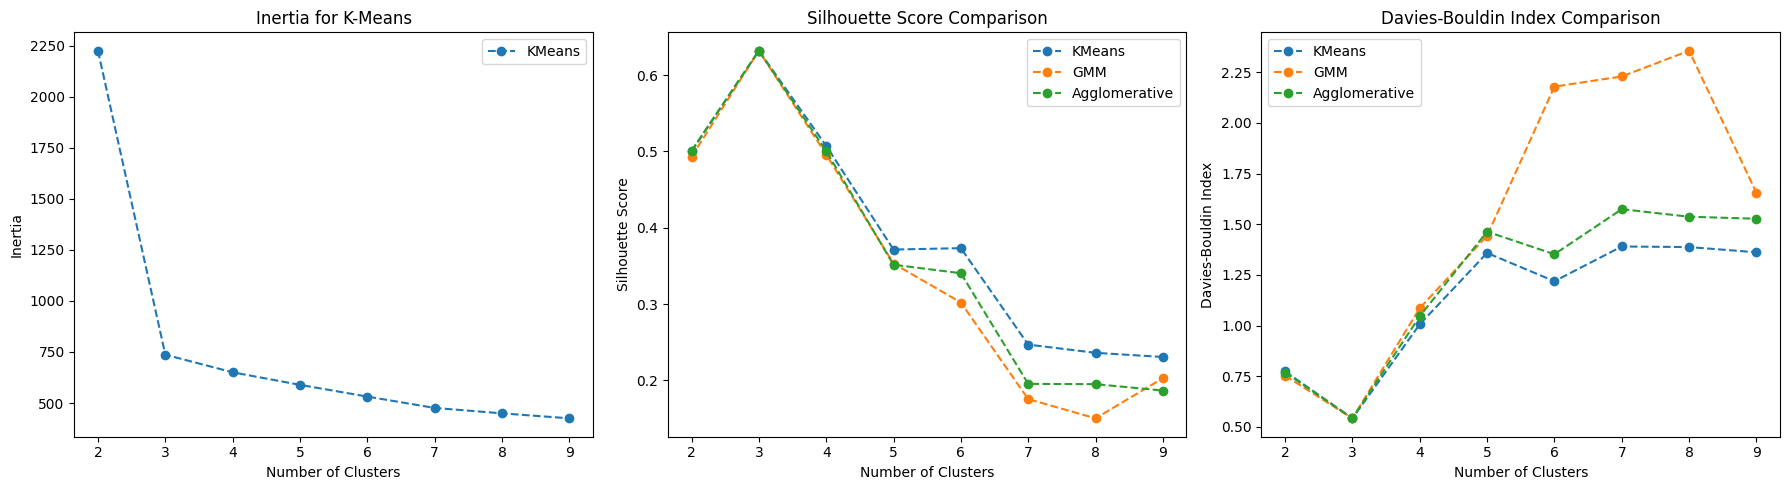

In [226]:
# Plot clustering metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Inertia Plot (Only for K-Means)
axes[0].plot(k_values, inertia, marker='o', linestyle='--', label="KMeans")
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia for K-Means')
axes[0].legend()

# Silhouette Score Plot
for method in silhouette_scores:
    axes[1].plot(k_values, silhouette_scores[method], marker='o', linestyle='--', label=method)

axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Comparison')
axes[1].legend()

# Davies-Bouldin Index Plot
for method in davies_bouldin_scores:
    axes[2].plot(k_values, davies_bouldin_scores[method], marker='o', linestyle='--', label=method)

axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies-Bouldin Index')
axes[2].set_title('Davies-Bouldin Index Comparison')
axes[2].legend()

plt.tight_layout()
plt.show()


In [227]:
# ---- Selecting Optimal K  = 3----
optimal_k = 3

# Final Clustering with Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(df_scaled)

agglom = AgglomerativeClustering(n_clusters=optimal_k)
df["Agglo_Cluster"] = agglom.fit_predict(df_scaled)

inertia = kmeans.inertia_

# Evaluate clustering with silhouette score and Davies-Bouldin Index
silhouette_kmeans = silhouette_score(df_scaled, df["KMeans_Cluster"])
db_kmeans = davies_bouldin_score(df_scaled, df["KMeans_Cluster"])

silhouette_gmm = silhouette_score(df_scaled, df["GMM_Cluster"])
db_gmm = davies_bouldin_score(df_scaled, df["GMM_Cluster"])

silhouette_agglom = silhouette_score(df_scaled, df["Agglo_Cluster"])
db_agglom = davies_bouldin_score(df_scaled, df["Agglo_Cluster"])

print(f"\nOptimal k = {optimal_k}")
print(f"K-Means - Inertia: {inertia:.3f}, Silhouette: {silhouette_kmeans:.3f}, DB Index: {db_kmeans:.3f}")
print(f"GMM - Silhouette: {silhouette_gmm:.3f}, DB Index: {db_gmm:.3f}")
print(f"Agglomerative - Silhouette: {silhouette_agglom:.3f}, DB Index: {db_agglom:.3f}")


Optimal k = 3
K-Means - Inertia: 736.695, Silhouette: 0.632, DB Index: 0.542
GMM - Silhouette: 0.632, DB Index: 0.542
Agglomerative - Silhouette: 0.632, DB Index: 0.542


In [228]:
kmeans_counts = df["KMeans_Cluster"].value_counts().sort_index()
gmm_counts = df["GMM_Cluster"].value_counts().sort_index()
agglom_counts = df["Agglo_Cluster"].value_counts().sort_index()

# Print results
print("KMeans Cluster Counts:\n", kmeans_counts)
print("\nGMM Cluster Counts:\n", gmm_counts)
print("\nAgglomerative Cluster Counts:\n", agglom_counts)

KMeans Cluster Counts:
 KMeans_Cluster
0    305
1    319
2    306
Name: count, dtype: int64

GMM Cluster Counts:
 GMM_Cluster
0    305
1    319
2    306
Name: count, dtype: int64

Agglomerative Cluster Counts:
 Agglo_Cluster
0    306
1    319
2    305
Name: count, dtype: int64


# 4. Identifying Clusters

In [229]:
cluster_columns = ['KMeans_Cluster', 'GMM_Cluster', 'Agglo_Cluster']

# Create a dictionary to store DataFrames for each clustering algorithm
df_dict = {}

# Generate statistical summary for each clustering algorithm
for cluster_col in cluster_columns:
    # Generate mean, std, count for each cluster column
    df_dict[cluster_col] = df.groupby(cluster_col).agg(['mean', 'std', 'count'])

    # Reset the index for better readability
    df_dict[cluster_col].reset_index(inplace=True)

# Access the resulting DataFrames:
kmeans_df = df_dict['KMeans_Cluster'].drop(columns=['GMM_Cluster', 'Agglo_Cluster'])
gmm_df = df_dict['GMM_Cluster'].drop(columns=['KMeans_Cluster', 'Agglo_Cluster'])
agglo_df = df_dict['Agglo_Cluster'].drop(columns=['GMM_Cluster', 'KMeans_Cluster'])

<ipython-input-229-8219ffb8674a>:15: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-229-8219ffb8674a>:16: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-229-8219ffb8674a>:17: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [230]:
kmeans_df

# K = 0 - > High Spenders
# K = 1 - > Window Shoppers
# K = 2 - > Bargain Hunters

KMeans_Cluster total_purchases                 avg_cart_value             \
                            mean       std count           mean        std   
0              0        4.885246  1.834415   305      48.606885  16.056935   
1              1       10.194357  3.023987   319     146.757555  28.293733   
2              2       19.656863  4.472492   306      30.483170  11.771742   

        total_time_spent                  product_click                  \
  count             mean        std count          mean       std count   
0   305        89.119738  16.075896   305     49.445902  6.478039   305   
1   319        40.140063  11.318086   319     19.862069  4.638481   319   
2   306        17.529641   7.239518   306     14.921569  3.881067   306   

  discount_counts                  
             mean       std count  
0        0.940984  0.871587   305  
1        1.962382  1.379942   319  
2        9.549020  2.773271   306

In [231]:
gmm_df

# K = 0 - > High Spenders
# K = 1 - > Window Shoppers
# K = 2 - > Bargain Hunters

GMM_Cluster total_purchases                 avg_cart_value                   \
                         mean       std count           mean        std count   
0           0        4.885246  1.834415   305      48.606885  16.056935   305   
1           1       10.194357  3.023987   319     146.757555  28.293733   319   
2           2       19.656863  4.472492   306      30.483170  11.771742   306   

  total_time_spent                  product_click                  \
              mean        std count          mean       std count   
0        89.119738  16.075896   305     49.445902  6.478039   305   
1        40.140063  11.318086   319     19.862069  4.638481   319   
2        17.529641   7.239518   306     14.921569  3.881067   306   

  discount_counts                  
             mean       std count  
0        0.940984  0.871587   305  
1        1.962382  1.379942   319  
2        9.549020  2.773271   306

In [232]:
agglo_df

# K = 0 - > Bargain Hunters
# K = 1 - > High Spenders
# K = 2 - > Window Shoppers

Agglo_Cluster total_purchases                 avg_cart_value             \
                           mean       std count           mean        std   
0             0       19.656863  4.472492   306      30.483170  11.771742   
1             1       10.194357  3.023987   319     146.757555  28.293733   
2             2        4.885246  1.834415   305      48.606885  16.056935   

        total_time_spent                  product_click                  \
  count             mean        std count          mean       std count   
0   306        17.529641   7.239518   306     14.921569  3.881067   306   
1   319        40.140063  11.318086   319     19.862069  4.638481   319   
2   305        89.119738  16.075896   305     49.445902  6.478039   305   

  discount_counts                  
             mean       std count  
0        9.549020  2.773271   306  
1        1.962382  1.379942   319  
2        0.940984  0.871587   305

In [233]:
# Save results
df_save = df.copy()

cluster_mapping = {
    0: 'High Spenders',
    1: 'Window Shoppers',
    2: 'Bargain Hunters'
}

df_save['Cluster_Description'] = df_save['KMeans_Cluster'].map(cluster_mapping)

df_save =  pd.concat([df_save, rows_without_nan['customer_id']], axis=1)
df_save.to_csv("customer_segments_all_methods.csv", index=False)
print("\nClustering complete. Results saved to 'customer_segments_all_methods.csv'")


Clustering complete. Results saved to 'customer_segments_all_methods.csv'


# 5. Visualizing identified clusters

In [234]:
new_df =pd.concat([df, df_save['Cluster_Description']], axis=1)

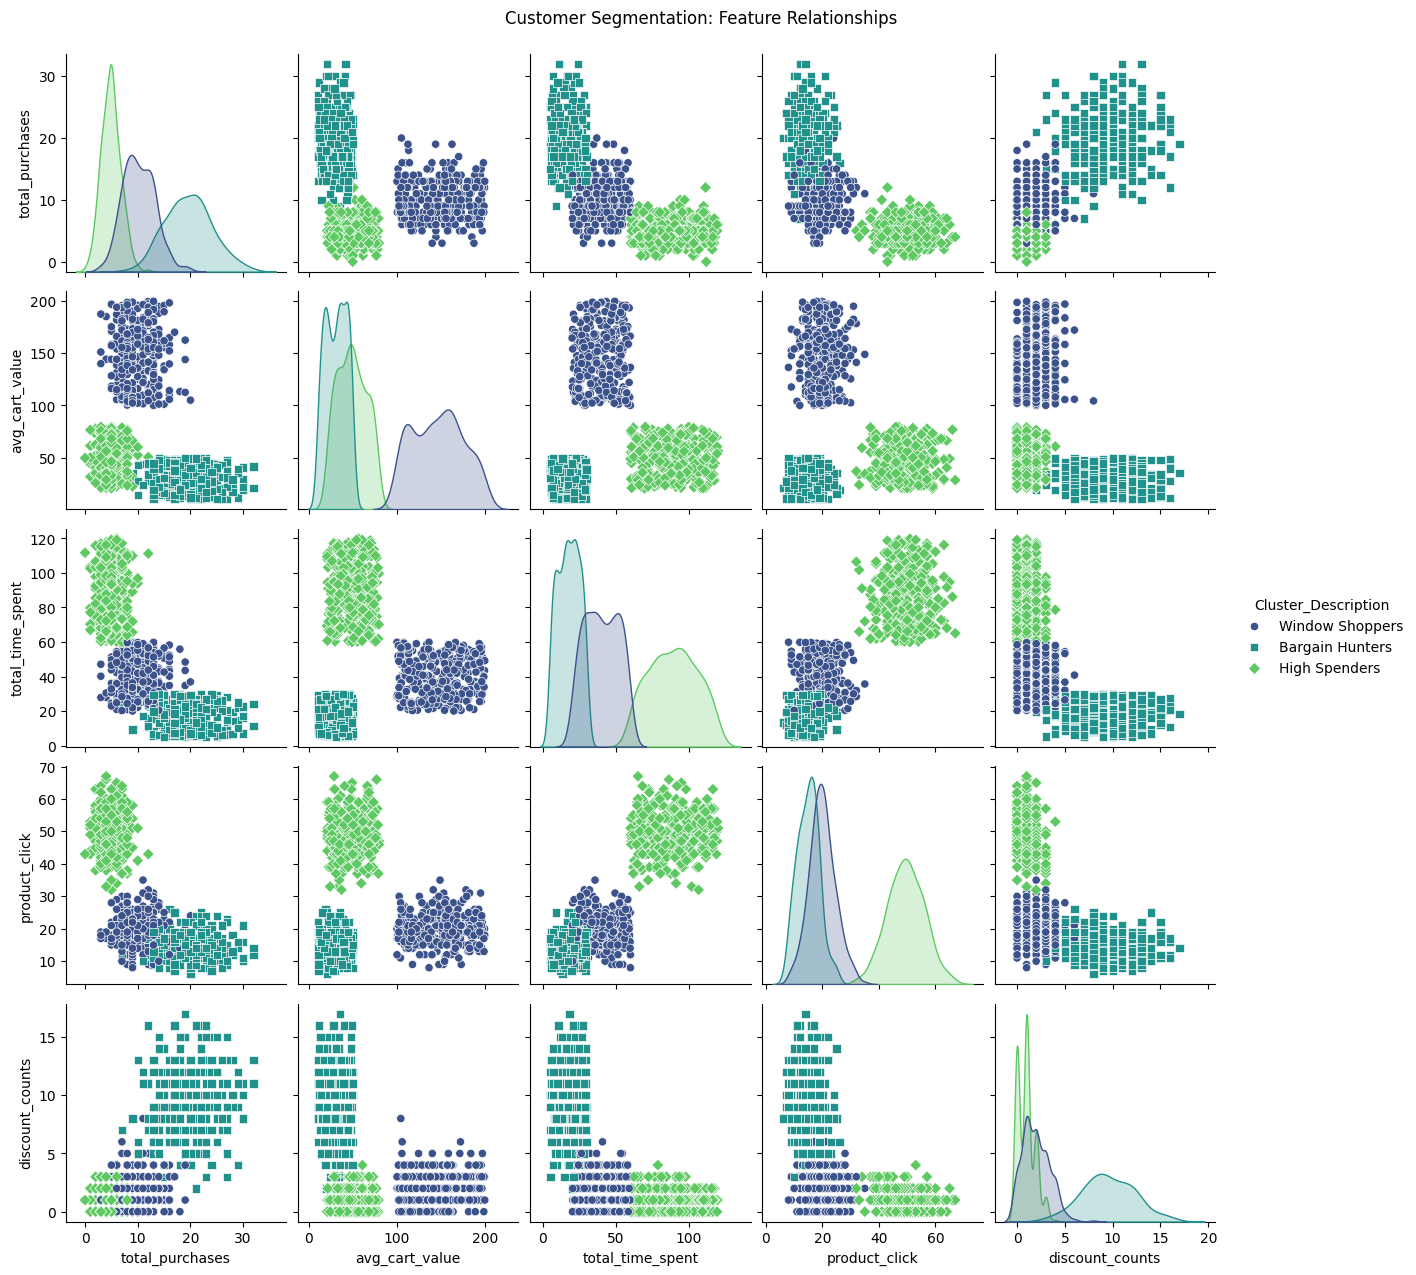

In [235]:

excluded_columns = ['KMeans_Cluster', 'GMM_Cluster', 'Agglo_Cluster']
selected_columns = [col for col in new_df.columns if col not in excluded_columns]

sns.pairplot(new_df[selected_columns ], hue="Cluster_Description",
             palette="viridis", diag_kind="kde", markers=["o", "s", "D"])

plt.suptitle("Customer Segmentation: Feature Relationships", y=1.02)
plt.show()


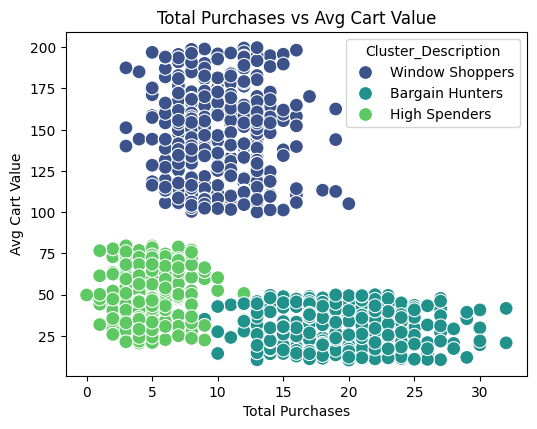

In [236]:
# List of important feature pairs for visualization
feature_pairs = [
    ('total_purchases', 'avg_cart_value'),
    # ('total_purchases', 'discount_counts'),
    # ('total_time_spent', 'product_click'),
    # ('avg_cart_value', 'discount_counts'),
    # ('product_click', 'discount_counts')
]

# Create scatterplots
plt.figure(figsize=(15, 12))
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=new_df[x_feature], y=new_df[y_feature], hue=new_df['Cluster_Description'], palette='viridis', s=100)
    plt.xlabel(x_feature.replace('_', ' ').title())
    plt.ylabel(y_feature.replace('_', ' ').title())
    plt.title(f"{x_feature.replace('_', ' ').title()} vs {y_feature.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()


In [279]:
import plotly.express as px

# Define feature triplets for 3D visualization
feature_triplets = [
# ('total_purchases', 'avg_cart_value', 'discount_counts')
# ('total_purchases', 'avg_cart_value', 'product_click')
('total_purchases', 'avg_cart_value', 'total_time_spent')
# ('total_purchases', 'discount_counts', 'product_click')
# ('total_purchases', 'discount_counts', 'total_time_spent')
# ('total_purchases', 'product_click', 'total_time_spent')
# ('avg_cart_value', 'discount_counts', 'product_click')
# ('avg_cart_value', 'discount_counts', 'total_time_spent')
# ('avg_cart_value', 'product_click', 'total_time_spent')
# ('discount_counts', 'product_click', 'total_time_spent')

]

# Create 3 interactive 3D scatter plots
for x_feature, y_feature, z_feature in feature_triplets:
    fig = px.scatter_3d(new_df,
                        x=x_feature,
                        y=y_feature,
                        z=z_feature,
                        color=new_df['Cluster_Description'].astype(str),
                        title=f"{x_feature.replace('_', ' ').title()} vs {y_feature.replace('_', ' ').title()} vs {z_feature.replace('_', ' ').title()}",
                        size_max=10,
                        opacity=0.8)

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))  # Adjust layout
    fig.show()


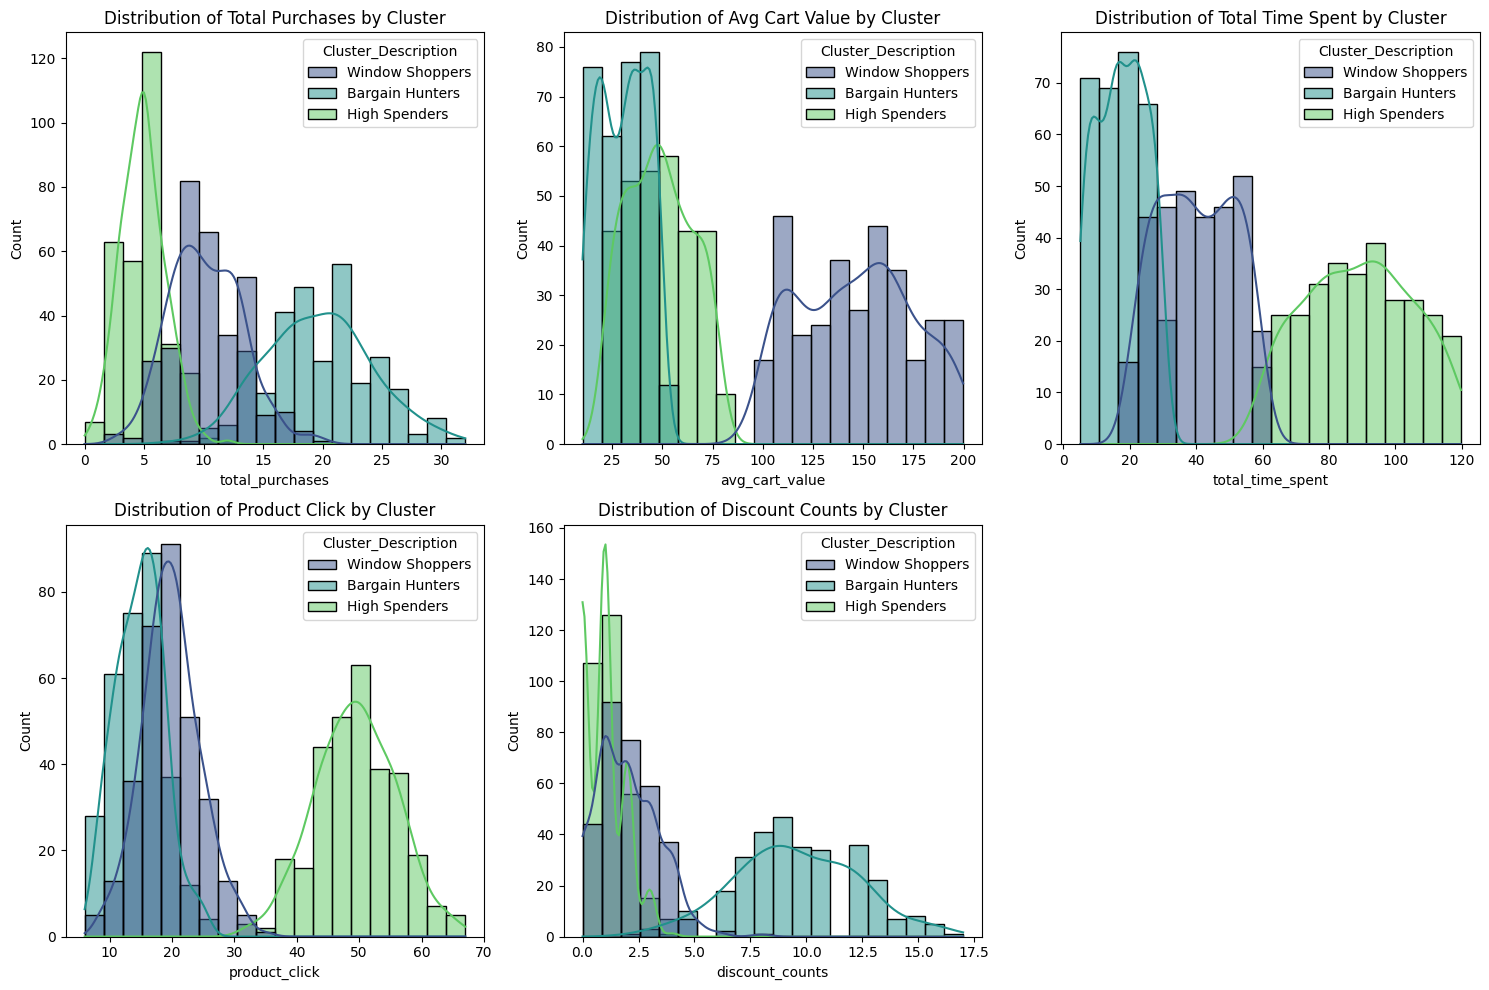

In [238]:
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(new_df, x=feature, hue="Cluster_Description", palette="viridis", kde=True, bins=20)
    plt.title(f"Distribution of {feature.replace('_', ' ').title()} by Cluster")

plt.tight_layout()
plt.show()


<ipython-input-239-74d8e4502289>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-239-74d8e4502289>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-239-74d8e4502289>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-239-74d8e4502289>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-239-74d8e4502289>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

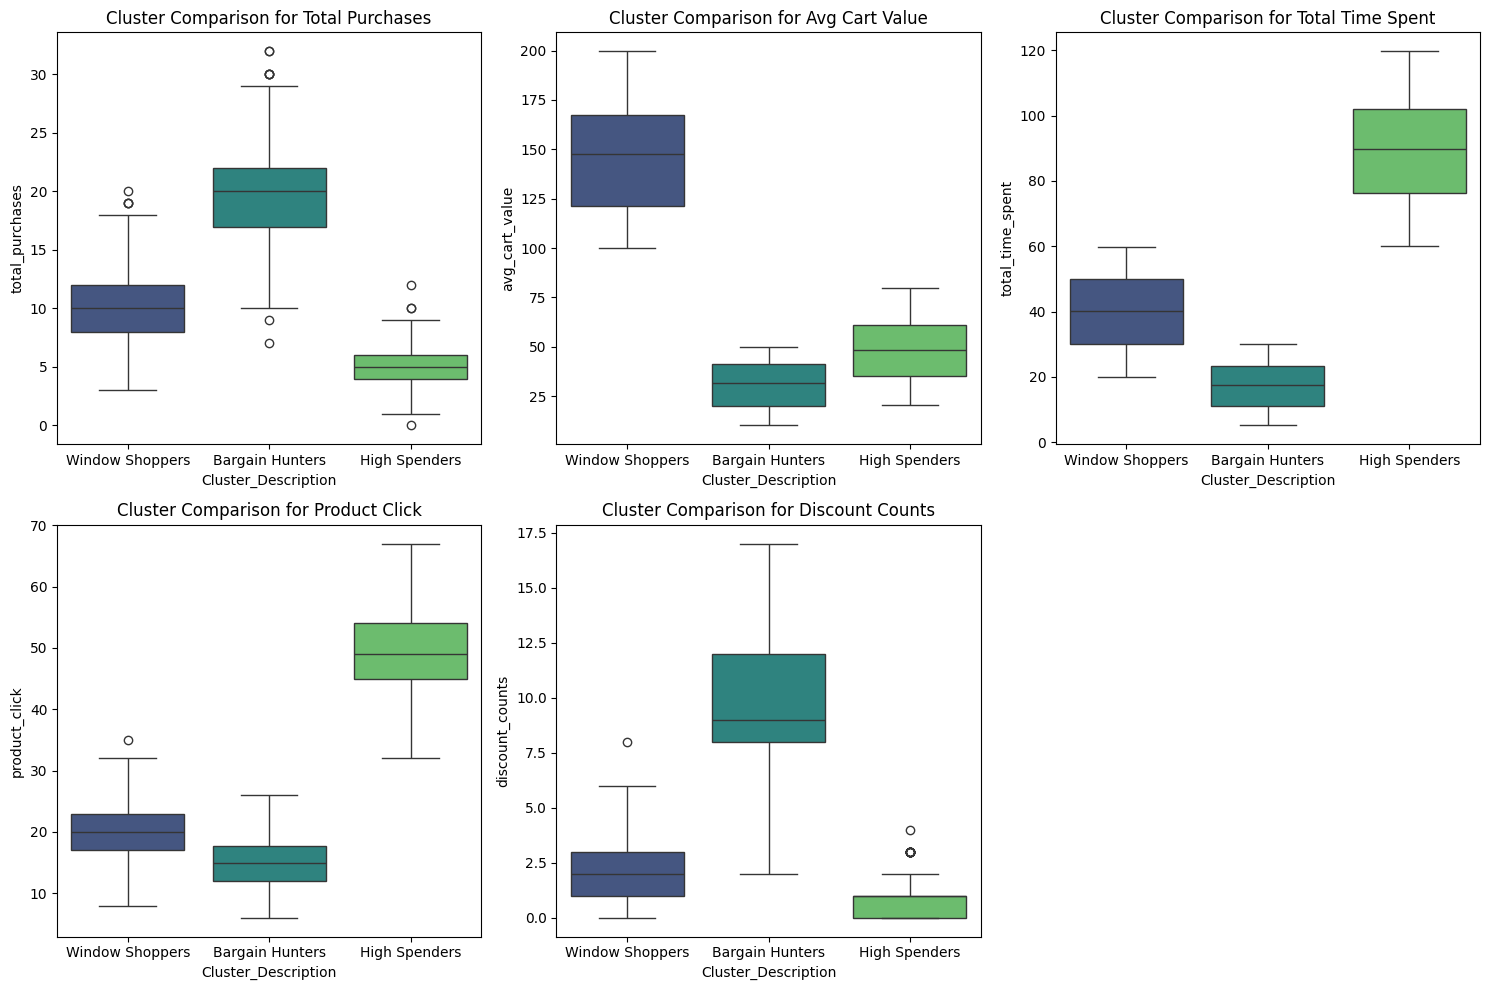

In [239]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Cluster_Description", y=feature, data=new_df, palette="viridis")
    plt.title(f"Cluster Comparison for {feature.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()
